# In this Jupyter Notebook Entry:
# 1. Import Libraries & Dataframe
# 2. Perform Regression Analysis
# 3. Examine MSE, R2, Slope for Variables affecting Happiness
# 4. Provide Insights

# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [5]:
path = r'C:\Users\natha\OneDrive\Desktop\Data Analytics\Jupyter\12-2023 World Happiness'

In [6]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'happiness_data_cleaned_5.csv'))

In [7]:
df.columns

Index(['Country', 'Year', 'Happiness_Score', 'GDP_Per_Capita',
       'Social_Support', 'Health_Life_Expectancy', 'Freedom_Life_Choices',
       'Generosity', 'Perceptions_of_Corruption', 'Region', 'Happiness_Rank'],
      dtype='object')

In [8]:
df.head(20)

,Country,Year,Happiness_Score,GDP_Per_Capita,Social_Support,Health_Life_Expectancy,Freedom_Life_Choices,Generosity,Perceptions_of_Corruption,Region,Happiness_Rank
0,Switzerland,2015,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,Western Europe,1
1,Iceland,2015,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,Western Europe,2
2,Denmark,2015,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,Western Europe,3
3,Norway,2015,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,Western Europe,4
4,Canada,2015,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,North America,5
5,Finland,2015,7.406,1.29025,1.31826,0.88911,0.64169,0.23351,0.41372,Western Europe,6
6,Netherlands,2015,7.378,1.32944,1.28017,0.89284,0.61576,0.47610,0.31814,Western Europe,7
7,Sweden,2015,7.364,1.33171,1.28907,0.91087,0.65980,0.36262,0.43844,Western Europe,8
8,New Zealand,2015,7.286,1.25018,1.31967,0.90837,0.63938,0.47501,0.42922,Australia and New Zealand,9
9,Australia,2015,7.284,1.33358,1.30923,0.93156,0.65124,0.43562,0.35637,Australia and New Zealand,10


In [9]:
df.shape

(790, 11)

In [10]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

Country                      0
Year                         0
Happiness_Score              0
GDP_Per_Capita               0
Social_Support               0
Health_Life_Expectancy       0
Freedom_Life_Choices         0
Generosity                   0
Perceptions_of_Corruption    0
Region                       0
Happiness_Rank               0
dtype: int64

In [11]:
dups = df.duplicated()

In [12]:
df.dtypes

Country                       object
Year                           int64
Happiness_Score              float64
GDP_Per_Capita               float64
Social_Support               float64
Health_Life_Expectancy       float64
Freedom_Life_Choices         float64
Generosity                   float64
Perceptions_of_Corruption    float64
Region                        object
Happiness_Rank                 int64
dtype: object

In [13]:
# Extreme Value Checks

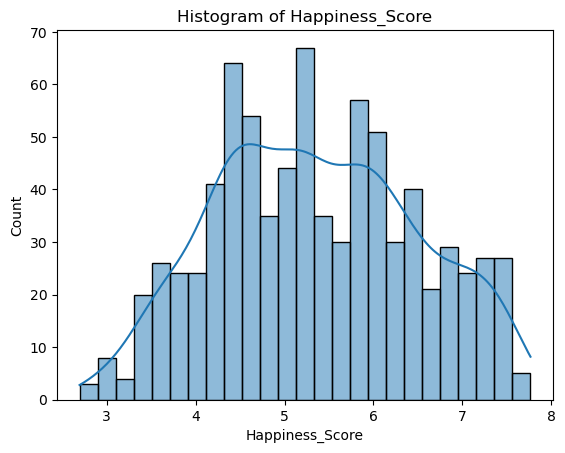

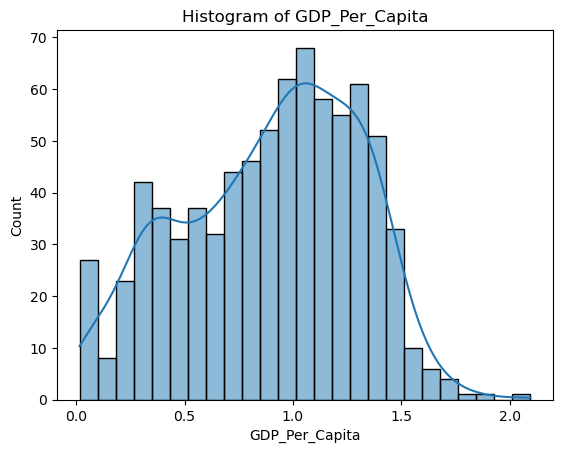

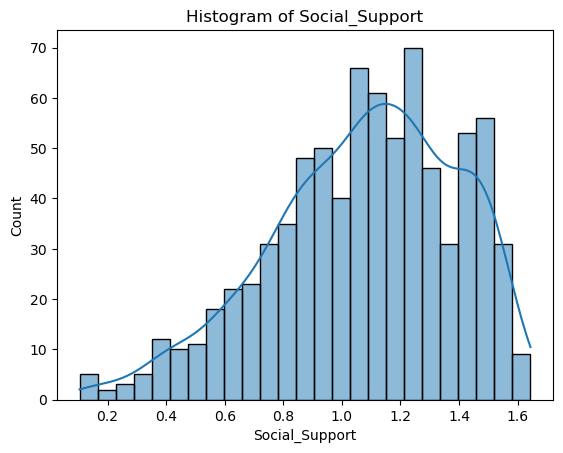

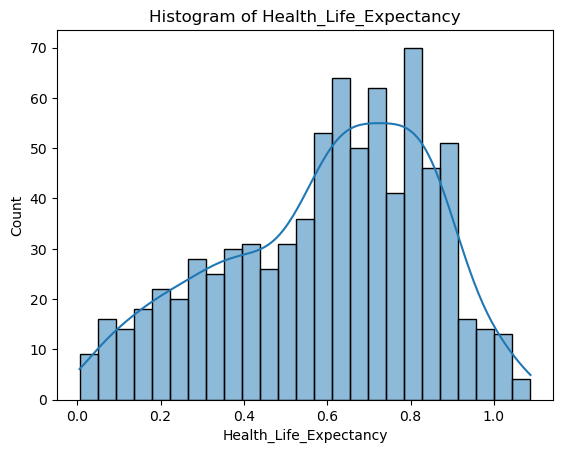

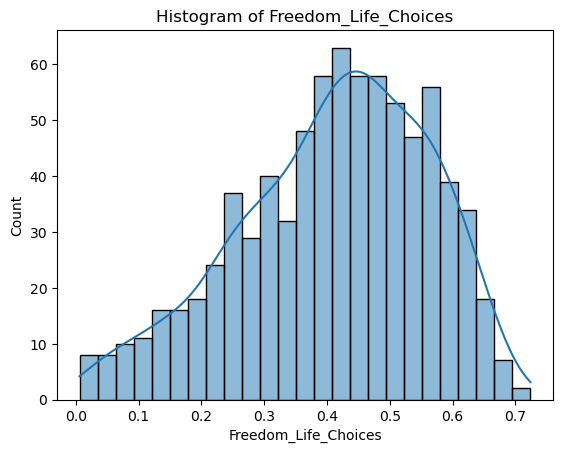

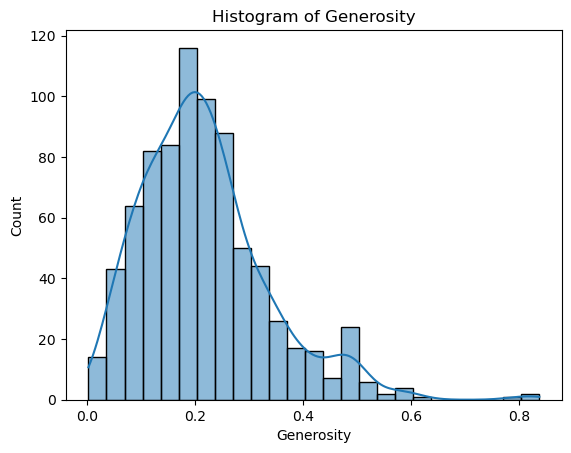

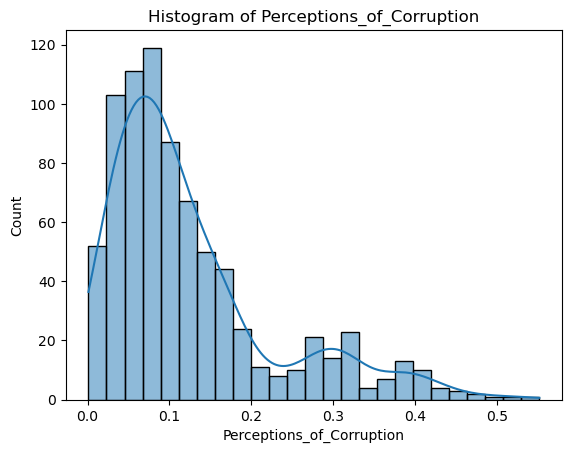

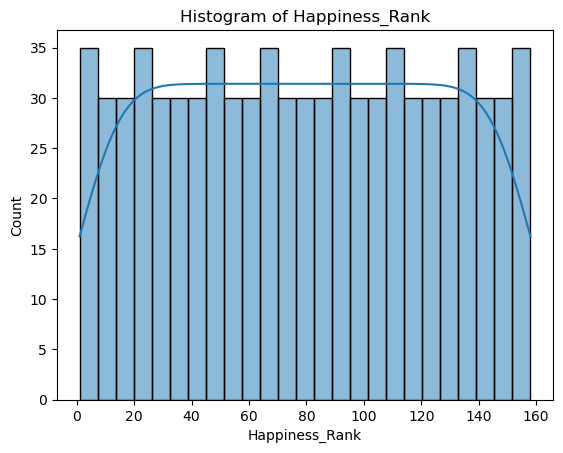

In [14]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Exclude 'Year' & "Happiness_Rank" column
numeric_columns = [column for column in numeric_columns if column != 'Year', 'Happiness_Rank']

for column in numeric_columns:
    sns.histplot(df[column], bins=25, kde=True)
    plt.title(f'Histogram of {column}')
    plt.show()

In [15]:
# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [16]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Exclude 'Year' column
numeric_columns = [column for column in numeric_columns if column != 'Year']

# Use describe to get mean, median, and max
statistics = df[numeric_columns].describe().loc[['mean', '50%', 'max']]

print(statistics)

      Happiness_Score  GDP_Per_Capita  Social_Support  Health_Life_Expectancy  \
mean         5.355816        0.895349        1.074358                0.597427   
50%          5.268500        0.955540        1.104700                0.637822   
max          7.769000        2.096000        1.644000                1.088000   

      Freedom_Life_Choices  Generosity  Perceptions_of_Corruption  \
mean              0.409969    0.216879                   0.124860   
50%               0.428560    0.201982                   0.092419   
max               0.724000    0.838075                   0.551910   

      Happiness_Rank  
mean            79.5  
50%             79.5  
max            158.0  


# Exploring Variables with Happiness_Score as the Dependent Variable

# GDP_Per_Capita & Happiness_Score

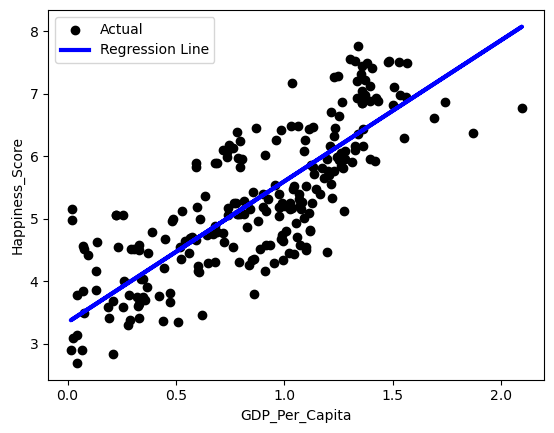

Slope: 2.25896064789668
Intercept: 3.3396978478417214
Mean Squared Error (MSE): 0.4828705836943336
R-squared (R2) Score: 0.6236874723496015
     Actual  Predicted
0     5.430   5.277207
1     6.253   5.133313
2     4.252   5.232526
3     5.762   6.115960
4     5.963   6.235184
..      ...        ...
232   4.800   5.871857
233   5.246   5.573810
234   4.360   5.284347
235   4.959   5.324579
236   4.643   4.563535

[237 rows x 2 columns]


In [17]:
# Reshape the variables into NumPy arrays
X = df['GDP_Per_Capita'].values.reshape(-1, 1)
y = df['Happiness_Score'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Run a linear regression on the training set
model = LinearRegression()
model.fit(X_train, y_train)

# Create predictions for y on the test set
y_pred = model.predict(X_test)

# Create a plot showing the regression line on the test set
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Regression Line')
plt.xlabel('GDP_Per_Capita')
plt.ylabel('Happiness_Score')
plt.legend()
plt.show()

# Check model performance statistics - MSE and R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the slope, MSE, and R2 score
slope = model.coef_[0]
intercept = model.intercept_

print(f'Slope: {slope}')
print(f'Intercept: {intercept}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2) Score: {r2}')

# Compare predicted y values with actual y values in a DataFrame
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df)

Slope:

On average, for each one-unit increase in GDP Per Capita, the predicted Happiness Score increases by approximately 2.26 units.

Mean Squared Error (MSE):

The MSE measures the average squared difference between predicted and actual Happiness Scores. The model's predictions have a moderate level of error, with a lower MSE indicating better accuracy. The relatively moderate MSE suggests that the model based on GDP Per Capita has a moderate level of prediction error.

R-squared (R2) Score:

Approximately 62.37% of the variability in Happiness Scores can be explained by the linear relationship with GDP Per Capita. This suggests that the model captures a substantial portion of the variability in happiness scores based on GDP Per Capita.

Overall Insights:

The positive slope indicates a positive relationship between GDP Per Capita and happiness, suggesting that higher levels of GDP Per Capita are associated with higher happiness scores.

The model, based on the metrics, explains about 62.37% of the variability in happiness scores using GDP Per Capita.

The MSE is moderate, indicating that the model has a moderate level of prediction error.

# Social_Support & Happiness_Score

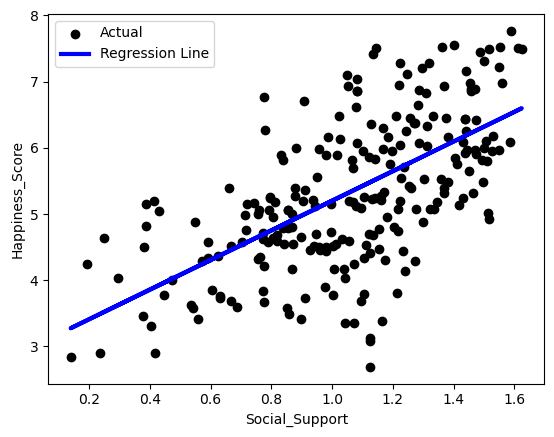

Slope: 2.2383909602326715
Intercept: 2.963142227535499
Mean Squared Error (MSE): 0.8064885790516928
R-squared (R2) Score: 0.37148427352485647
     Actual  Predicted
0     5.430   5.769900
1     6.253   5.743224
2     4.252   3.394010
3     5.762   5.629066
4     5.963   6.251971
..      ...        ...
232   4.800   5.654024
233   5.246   5.519385
234   4.360   4.361622
235   4.959   4.763570
236   4.643   3.517122

[237 rows x 2 columns]


In [18]:
# Reshape the variables into NumPy arrays
X = df['Social_Support'].values.reshape(-1, 1)
y = df['Happiness_Score'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Run a linear regression on the training set
model = LinearRegression()
model.fit(X_train, y_train)

# Create predictions for y on the test set
y_pred = model.predict(X_test)

# Create a plot showing the regression line on the test set
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Regression Line')
plt.xlabel('Social_Support')
plt.ylabel('Happiness_Score')
plt.legend()
plt.show()

# Check model performance statistics - MSE and R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the slope, MSE, and R2 score
slope = model.coef_[0]
intercept = model.intercept_

print(f'Slope: {slope}')
print(f'Intercept: {intercept}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2) Score: {r2}')

# Compare predicted y values with actual y values in a DataFrame
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df)

Slope:

On average, for each one-unit increase in Social Support, the predicted Happiness Score increases by approximately 2.24 units.

Mean Squared Error (MSE):

The MSE measures the average squared difference between predicted and actual Happiness Scores. The model's predictions have a relatively high level of error, with a lower MSE indicating better accuracy. The relatively high MSE suggests that the model based on Social Support has a higher level of prediction error.

R-squared (R2) Score:

Approximately 37.15% of the variability in Happiness Scores can be explained by the linear relationship with Social Support. This suggests that the model captures a moderate portion of the variability in happiness scores based on Social Support.

Overall Insights:

The positive slope indicates a positive relationship between Social Support and happiness, suggesting that higher levels of Social Support are associated with higher happiness scores.

The model, based on the metrics, explains about 37.15% of the variability in happiness scores using Social Support.

The MSE is relatively high, indicating that the model has a higher level of prediction error compared to some other relationships.

# Health_Life_Expectancy & Happiness Score

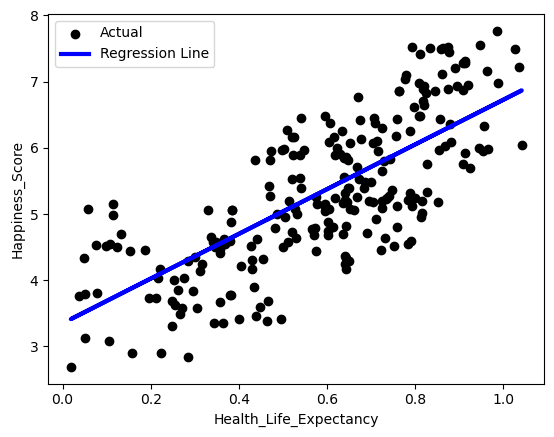

Slope: 3.376976700067169
Intercept: 3.349700612307089
Mean Squared Error (MSE): 0.5527978141151907
R-squared (R2) Score: 0.5691915189412611
     Actual  Predicted
0     5.430   4.930156
1     6.253   6.014135
2     4.252   5.512148
3     5.762   6.419372
4     5.963   5.198087
..      ...        ...
232   4.800   5.912995
233   5.246   6.047905
234   4.360   5.513769
235   4.959   6.096027
236   4.643   5.139127

[237 rows x 2 columns]


In [19]:
# Reshape the variables into NumPy arrays
X = df['Health_Life_Expectancy'].values.reshape(-1, 1)
y = df['Happiness_Score'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Run a linear regression on the training set
model = LinearRegression()
model.fit(X_train, y_train)

# Create predictions for y on the test set
y_pred = model.predict(X_test)

# Create a plot showing the regression line on the test set
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Regression Line')
plt.xlabel('Health_Life_Expectancy')
plt.ylabel('Happiness_Score')
plt.legend()
plt.show()

# Check model performance statistics - MSE and R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the slope, MSE, and R2 score
slope = model.coef_[0]
intercept = model.intercept_

print(f'Slope: {slope}')
print(f'Intercept: {intercept}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2) Score: {r2}')

# Compare predicted y values with actual y values in a DataFrame
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df)

Slope:

On average, for each one-unit increase in Health Life Expectancy, the predicted Happiness Score increases by approximately 3.38 units.

Mean Squared Error (MSE):

The MSE measures the average squared difference between predicted and actual Happiness Scores. The model's predictions have a relatively moderate level of error, with a lower MSE indicating better accuracy. The MSE suggests that the model based on Health Life Expectancy has a moderate level of prediction error.

R-squared (R2) Score:

Approximately 56.92% of the variability in Happiness Scores can be explained by the linear relationship with Health Life Expectancy. This suggests that the model captures a moderate portion of the variability in happiness scores based on Health Life Expectancy.

Overall Insights:

The positive slope indicates a positive relationship between Health Life Expectancy and happiness, suggesting that higher levels of Health Life Expectancy are associated with higher happiness scores.

The model, based on the metrics, explains about 56.92% of the variability in happiness scores using Health Life Expectancy.

The MSE is moderate, indicating that the model has a moderate level of prediction error compared to some other relationships.

# Freedom_Life_Choices & Happiness_Score

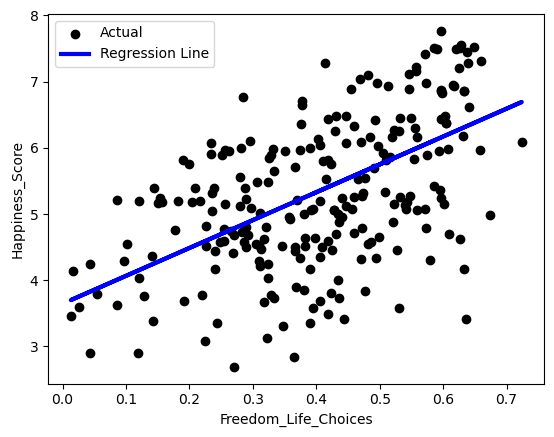

Slope: 4.209078563105233
Intercept: 3.645900125185098
Mean Squared Error (MSE): 0.9235125827746321
R-squared (R2) Score: 0.2802846848072601
     Actual  Predicted
0     5.430   6.109115
1     6.253   5.455804
2     4.252   5.012209
3     5.762   5.426340
4     5.963   5.219183
..      ...        ...
232   4.800   4.997519
233   5.246   6.158720
234   4.360   4.236728
235   4.959   5.149930
236   4.643   5.320187

[237 rows x 2 columns]


In [20]:
# Reshape the variables into NumPy arrays
X = df['Freedom_Life_Choices'].values.reshape(-1, 1)
y = df['Happiness_Score'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Run a linear regression on the training set
model = LinearRegression()
model.fit(X_train, y_train)

# Create predictions for y on the test set
y_pred = model.predict(X_test)

# Create a plot showing the regression line on the test set
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Regression Line')
plt.xlabel('Freedom_Life_Choices')
plt.ylabel('Happiness_Score')
plt.legend()
plt.show()

# Check model performance statistics - MSE and R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the slope, MSE, and R2 score
slope = model.coef_[0]
intercept = model.intercept_

print(f'Slope: {slope}')
print(f'Intercept: {intercept}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2) Score: {r2}')

# Compare predicted y values with actual y values in a DataFrame
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df)

Slope:

On average, for each one-unit increase in Freedom Life Choices, the predicted Happiness Score increases by approximately 4.21 units.

Mean Squared Error (MSE):

The MSE measures the average squared difference between predicted and actual Happiness Scores. The model's predictions have a relatively high level of error, with a lower MSE indicating better accuracy. The MSE suggests that the model based on Freedom Life Choices has a higher level of prediction error.

R-squared (R2) Score:

Approximately 28.03% of the variability in Happiness Scores can be explained by the linear relationship with Freedom Life Choices. This suggests that the model captures a relatively small portion of the variability in happiness scores based on Freedom Life Choices.

Overall Insights:

The positive slope indicates a positive relationship between Freedom Life Choices and happiness, suggesting that higher levels of Freedom Life Choices are associated with higher happiness scores.

The model, based on the metrics, explains only about 28.03% of the variability in happiness scores using Freedom Life Choices.

The MSE is relatively high, indicating that the model has a higher level of prediction error compared to some other relationships.

# Generosity & Happiness_Score

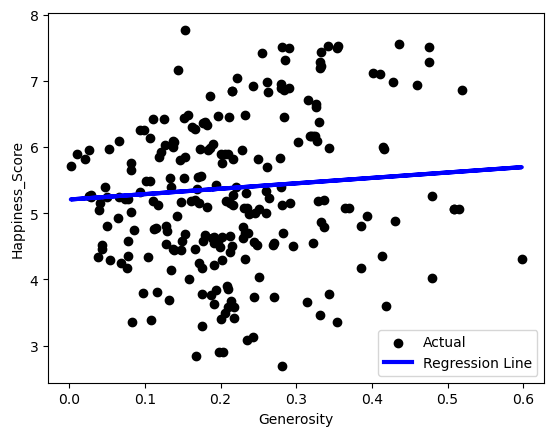

Slope: 0.816460833881513
Intercept: 5.2069006092202486
Mean Squared Error (MSE): 1.2604643371655584
R-squared (R2) Score: 0.017690170515306414
     Actual  Predicted
0     5.430   5.364897
1     6.253   5.282831
2     4.252   5.262306
3     5.762   5.371826
4     5.963   5.249572
..      ...        ...
232   4.800   5.311408
233   5.246   5.230578
234   4.360   5.270527
235   4.959   5.323426
236   4.643   5.363106

[237 rows x 2 columns]


In [21]:
# Reshape the variables into NumPy arrays
X = df['Generosity'].values.reshape(-1, 1)
y = df['Happiness_Score'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Run a linear regression on the training set
model = LinearRegression()
model.fit(X_train, y_train)

# Create predictions for y on the test set
y_pred = model.predict(X_test)

# Create a plot showing the regression line on the test set
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Regression Line')
plt.xlabel('Generosity')
plt.ylabel('Happiness_Score')
plt.legend()
plt.show()

# Check model performance statistics - MSE and R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the slope, MSE, and R2 score
slope = model.coef_[0]
intercept = model.intercept_

print(f'Slope: {slope}')
print(f'Intercept: {intercept}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2) Score: {r2}')

# Compare predicted y values with actual y values in a DataFrame
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df)

Slope:

On average, for each one-unit increase in Generosity, the predicted Happiness Score increases by approximately 0.82 units.

Mean Squared Error (MSE):

The MSE measures the average squared difference between predicted and actual Happiness Scores. The model's predictions have a relatively high level of error, with a lower MSE indicating better accuracy. The MSE suggests that the model based on Generosity has a higher level of prediction error.

R-squared (R2) Score:

Approximately 1.77% of the variability in Happiness Scores can be explained by the linear relationship with Generosity. This suggests that the model captures only a very small portion of the variability in happiness scores based on Generosity.

Overall Insights:

The positive slope indicates a positive relationship between Generosity and happiness, suggesting that higher levels of Generosity are associated with higher happiness scores.

The model, based on the metrics, explains only about 1.77% of the variability in happiness scores using Generosity.

The MSE is relatively high, indicating that the model has a higher level of prediction error compared to some other relationships.

# Perceptions_of_Corruption & Happiness_Score

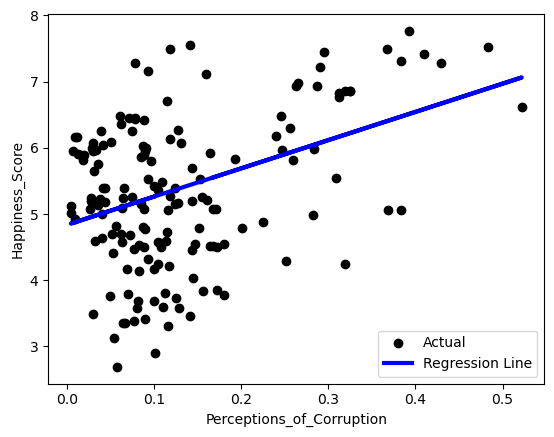

Slope: 4.260832776216045
Intercept: 4.83961684954861
Mean Squared Error (MSE): 1.097286802636608
R-squared (R2) Score: 0.14988076119181726
     Actual  Predicted
0     5.430   5.262853
1     6.253   5.154918
2     4.252   6.197970
3     5.762   4.988746
4     5.963   4.980066
..      ...        ...
153   5.212   5.524120
154   5.695   5.448064
155   3.355   5.112310
156   5.855   5.199828
157   4.516   5.551176

[158 rows x 2 columns]


In [22]:
# Reshape the variables into NumPy arrays
X = df['Perceptions_of_Corruption'].values.reshape(-1, 1)
y = df['Happiness_Score'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Run a linear regression on the training set
model = LinearRegression()
model.fit(X_train, y_train)

# Create predictions for y on the test set
y_pred = model.predict(X_test)

# Create a plot showing the regression line on the test set
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Regression Line')
plt.xlabel('Perceptions_of_Corruption')
plt.ylabel('Happiness_Score')
plt.legend()
plt.show()

# Check model performance statistics - MSE and R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the slope, MSE, and R2 score
slope = model.coef_[0]
intercept = model.intercept_

print(f'Slope: {slope}')
print(f'Intercept: {intercept}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2) Score: {r2}')

# Compare predicted y values with actual y values in a DataFrame
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df)

Slope:

On average, for each one-unit increase in Perceptions of Corruption, the predicted Happiness Score increases by approximately 4.26 units.

Mean Squared Error (MSE):

The MSE measures the average squared difference between predicted and actual Happiness Scores. The model's predictions have a relatively high level of error, with a lower MSE indicating better accuracy. The MSE suggests that the model based on Perceptions of Corruption has a higher level of prediction error.

R-squared (R2) Score:

Approximately 14.99% of the variability in Happiness Scores can be explained by the linear relationship with Perceptions of Corruption. This suggests that the model captures only a small portion of the variability in happiness scores based on Perceptions of Corruption.

Overall Insights:

The positive slope indicates a positive relationship between Perceptions of Corruption and happiness, suggesting that higher levels of Perceptions of Corruption are associated with higher happiness scores.

The model, based on the metrics, explains only about 14.99% of the variability in happiness scores using Perceptions of Corruption.

The MSE is relatively high, indicating that the model has a higher level of prediction error compared to some other relationships.

# Other Variables Compared Against Each Other for more Insight

# Perceptions_of_Corruption & Freedom_Life_Choices

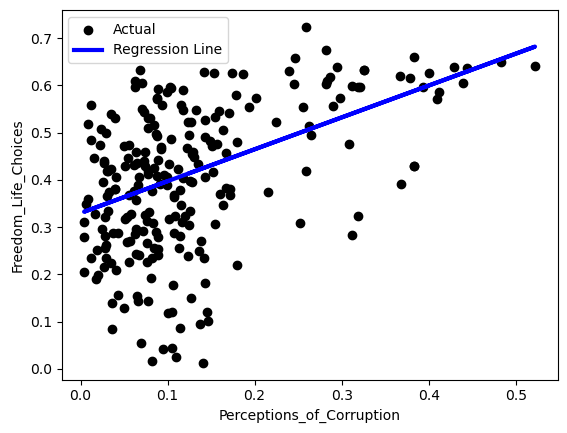

Slope: 0.6744078255250064
Intercept: 0.32990778213194527
Mean Squared Error (MSE): 0.01921914281852048
R-squared (R2) Score: 0.21679658537693813
       Actual  Predicted
0    0.585215   0.396898
1    0.430000   0.379814
2    0.324610   0.544909
3    0.423000   0.353512
4    0.373783   0.352138
..        ...        ...
232  0.321120   0.348508
233  0.597000   0.399372
234  0.140370   0.354294
235  0.357330   0.373158
236  0.397780   0.414769

[237 rows x 2 columns]


In [23]:
# Reshape the variables into NumPy arrays
X = df['Perceptions_of_Corruption'].values.reshape(-1, 1)
y = df['Freedom_Life_Choices'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Run a linear regression on the training set
model = LinearRegression()
model.fit(X_train, y_train)

# Create predictions for y on the test set
y_pred = model.predict(X_test)

# Create a plot showing the regression line on the test set
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Regression Line')
plt.xlabel('Perceptions_of_Corruption')
plt.ylabel('Freedom_Life_Choices')
plt.legend()
plt.show()

# Check model performance statistics - MSE and R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the slope, MSE, and R2 score
slope = model.coef_[0]
intercept = model.intercept_

print(f'Slope: {slope}')
print(f'Intercept: {intercept}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2) Score: {r2}')

# Compare predicted y values with actual y values in a DataFrame
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df)

Slope:

On average, for each one-unit increase in Freedom Life Choices, the predicted Perceptions of Corruption increases by approximately 0.67 units.

Mean Squared Error (MSE):

The MSE measures the average squared difference between predicted and actual Perceptions of Corruption scores. The model's predictions have a relatively low level of error, with a lower MSE indicating better accuracy. The MSE suggests that the model based on Freedom Life Choices has a relatively low level of prediction error.

R-squared (R2) Score:

Approximately 21.68% of the variability in Perceptions of Corruption can be explained by the linear relationship with Freedom Life Choices. This suggests that the model captures a moderate portion of the variability in perceptions of corruption based on Freedom Life Choices.

Overall Insights:

The positive slope indicates a positive relationship between Freedom Life Choices and Perceptions of Corruption, suggesting that higher levels of Freedom Life Choices are associated with higher perceptions of corruption.

The model, based on the metrics, explains about 21.68% of the variability in perceptions of corruption using Freedom Life Choices.

The MSE is relatively low, indicating that the model has a lower level of prediction error compared to some other relationships.

# Generosity & Social_Support

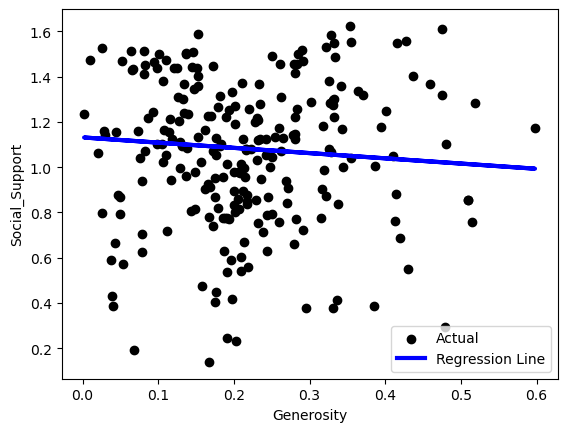

Slope: -0.231097166971644
Intercept: 1.131616771623236
Mean Squared Error (MSE): 0.10362761849696145
R-squared (R2) Score: -0.016309562130831345
       Actual  Predicted
0    1.253918   1.086896
1    1.242000   1.110125
2    0.192490   1.115935
3    1.191000   1.084935
4    1.469282   1.119539
..        ...        ...
232  1.202150   1.102036
233  1.142000   1.124915
234  0.624770   1.113607
235  0.804340   1.098635
236  0.247490   1.087403

[237 rows x 2 columns]


In [24]:
# Reshape the variables into NumPy arrays
X = df['Generosity'].values.reshape(-1, 1)
y = df['Social_Support'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Run a linear regression on the training set
model = LinearRegression()
model.fit(X_train, y_train)

# Create predictions for y on the test set
y_pred = model.predict(X_test)

# Create a plot showing the regression line on the test set
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Regression Line')
plt.xlabel('Generosity')
plt.ylabel('Social_Support')
plt.legend()
plt.show()

# Check model performance statistics - MSE and R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the slope, MSE, and R2 score
slope = model.coef_[0]
intercept = model.intercept_

print(f'Slope: {slope}')
print(f'Intercept: {intercept}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2) Score: {r2}')

# Compare predicted y values with actual y values in a DataFrame
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df)

Slope:

On average, for each one-unit increase in Social Support, the predicted Generosity decreases by approximately 0.23 units.

Mean Squared Error (MSE):

The MSE measures the average squared difference between predicted and actual Generosity scores. The model's predictions have a relatively low level of error, with a lower MSE indicating better accuracy. The MSE suggests that the model based on Social Support has a relatively low level of prediction error.

R-squared (R2) Score:

The negative R2 score suggests that the linear relationship between Generosity and Social Support does not explain the variability in Generosity scores well. The model captures a very small portion of the variability in generosity based on Social Support.

Overall Insights:

The negative slope indicates a negative relationship between Social Support and Generosity, suggesting that higher levels of Social Support are associated with lower generosity scores.

The model, based on the metrics, explains only a very small portion of the variability in generosity scores using Social Support.

The MSE is relatively low, indicating that the model has a lower level of prediction error compared to some other relationships.

# Freedom_Life_Choices & GDP_Per_Capita

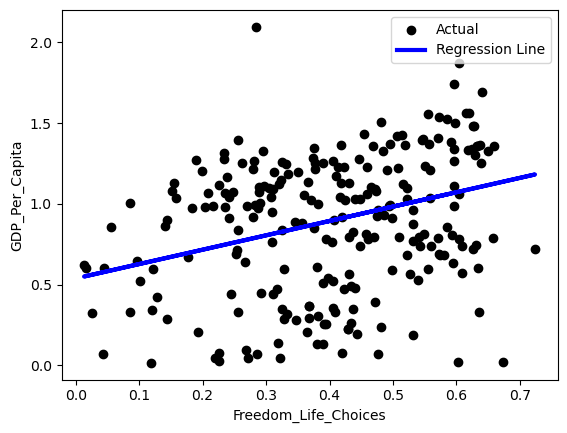

Slope: 0.8889264169125172
Intercept: 0.5378919698712537
Mean Squared Error (MSE): 0.1683665672795401
R-squared (R2) Score: 0.0716477336949003
       Actual  Predicted
0    0.857699   1.058105
1    0.794000   0.920130
2    0.837920   0.826446
3    1.229000   0.913908
4    1.281778   0.870158
..        ...        ...
232  1.120940   0.823344
233  0.989000   1.068581
234  0.860860   0.662671
235  0.878670   0.855532
236  0.541770   0.891489

[237 rows x 2 columns]


In [25]:
# Reshape the variables into NumPy arrays
X = df['Freedom_Life_Choices'].values.reshape(-1, 1)
y = df['GDP_Per_Capita'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Run a linear regression on the training set
model = LinearRegression()
model.fit(X_train, y_train)

# Create predictions for y on the test set
y_pred = model.predict(X_test)

# Create a plot showing the regression line on the test set
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Regression Line')
plt.xlabel('Freedom_Life_Choices')
plt.ylabel('GDP_Per_Capita')
plt.legend()
plt.show()

# Check model performance statistics - MSE and R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the slope, MSE, and R2 score
slope = model.coef_[0]
intercept = model.intercept_

print(f'Slope: {slope}')
print(f'Intercept: {intercept}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2) Score: {r2}')

# Compare predicted y values with actual y values in a DataFrame
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df)

Slope:

On average, for each one-unit increase in GDP Per Capita, the predicted Freedom Life Choices increases by approximately 0.89 units.

Mean Squared Error (MSE):

The MSE measures the average squared difference between predicted and actual Freedom Life Choices scores. The model's predictions have a moderate level of error, with a lower MSE indicating better accuracy. The MSE suggests that the model based on GDP Per Capita has a moderate level of prediction error.

R-squared (R2) Score:

The positive R2 score suggests that the linear relationship between Freedom Life Choices and GDP Per Capita explains a small portion of the variability in Freedom Life Choices scores. The model captures a small portion of the variability in freedom life choices based on GDP Per Capita.

Overall Insights:

The positive slope indicates a positive relationship between GDP Per Capita and Freedom Life Choices, suggesting that higher levels of GDP Per Capita are associated with higher freedom life choices scores.

The model, based on the metrics, explains only a small portion of the variability in freedom life choices scores using GDP Per Capita.

The MSE is moderate, indicating that the model has a moderate level of prediction error compared to some other relationships.

# GDP_Per_Capita & Health_Life_Expectancy

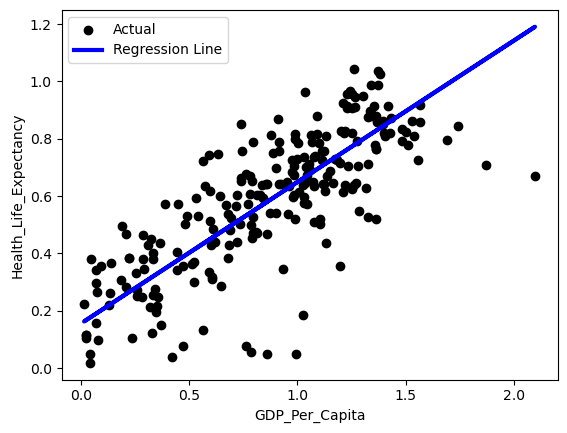

Slope: 0.49385484124813145
Intercept: 0.15547349159096047
Mean Squared Error (MSE): 0.024085998620091864
R-squared (R2) Score: 0.5830185838522767
       Actual  Predicted
0    0.468009   0.579052
1    0.789000   0.547594
2    0.640350   0.569284
3    0.909000   0.762421
4    0.547349   0.788486
..        ...        ...
232  0.759050   0.709055
233  0.799000   0.643896
234  0.640830   0.580613
235  0.813250   0.589409
236  0.529890   0.423029

[237 rows x 2 columns]


In [26]:
# Reshape the variables into NumPy arrays
X = df['GDP_Per_Capita'].values.reshape(-1, 1)
y = df['Health_Life_Expectancy'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Run a linear regression on the training set
model = LinearRegression()
model.fit(X_train, y_train)

# Create predictions for y on the test set
y_pred = model.predict(X_test)

# Create a plot showing the regression line on the test set
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Regression Line')
plt.xlabel('GDP_Per_Capita')
plt.ylabel('Health_Life_Expectancy')
plt.legend()
plt.show()

# Check model performance statistics - MSE and R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the slope, MSE, and R2 score
slope = model.coef_[0]
intercept = model.intercept_

print(f'Slope: {slope}')
print(f'Intercept: {intercept}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2) Score: {r2}')

# Compare predicted y values with actual y values in a DataFrame
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df)

Slope:

On average, for each one-unit increase in GDP Per Capita, the predicted Health Life Expectancy increases by approximately 0.49 units.

Mean Squared Error (MSE):

The MSE measures the average squared difference between predicted and actual Health Life Expectancy scores. The model's predictions have a relatively low level of error, with a lower MSE indicating better accuracy. The low MSE suggests that the model based on GDP Per Capita has good accuracy in predicting Health Life Expectancy.

R-squared (R2) Score:

The positive R2 score indicates that the linear relationship between Health Life Expectancy and GDP Per Capita explains a substantial portion of the variability in Health Life Expectancy scores. The model captures a significant portion of the variability in health life expectancy based on GDP Per Capita.

Overall Insights:

The positive slope indicates a positive relationship between GDP Per Capita and Health Life Expectancy, suggesting that higher levels of GDP Per Capita are associated with higher health life expectancy scores.

The model, based on the metrics, explains a substantial portion of the variability in health life expectancy scores using GDP Per Capita.

The MSE is low, indicating that the model has good accuracy in predicting health life expectancy based on GDP Per Capita.

# Social_Support & Health_Life_Expectancy

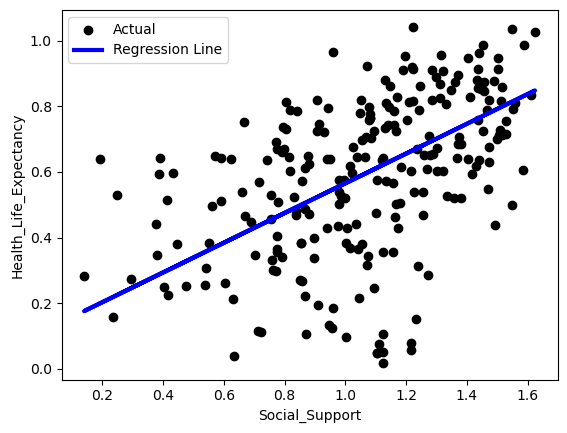

Slope: 0.45281314866383493
Intercept: 0.11267389321128596
Mean Squared Error (MSE): 0.04537544609747168
R-squared (R2) Score: 0.21445159611213727
       Actual  Predicted
0    0.468009   0.680464
1    0.789000   0.675068
2    0.640350   0.199836
3    0.909000   0.651974
4    0.547349   0.777984
..        ...        ...
232  0.759050   0.657023
233  0.799000   0.629787
234  0.640830   0.395578
235  0.813250   0.476890
236  0.529890   0.224741

[237 rows x 2 columns]


In [27]:
# Reshape the variables into NumPy arrays
X = df['Social_Support'].values.reshape(-1, 1)
y = df['Health_Life_Expectancy'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Run a linear regression on the training set
model = LinearRegression()
model.fit(X_train, y_train)

# Create predictions for y on the test set
y_pred = model.predict(X_test)

# Create a plot showing the regression line on the test set
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Regression Line')
plt.xlabel('Social_Support')
plt.ylabel('Health_Life_Expectancy')
plt.legend()
plt.show()

# Check model performance statistics - MSE and R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the slope, MSE, and R2 score
slope = model.coef_[0]
intercept = model.intercept_

print(f'Slope: {slope}')
print(f'Intercept: {intercept}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2) Score: {r2}')

# Compare predicted y values with actual y values in a DataFrame
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df)

Slope:

On average, for each one-unit increase in Social Support, the predicted Health Life Expectancy increases by approximately 0.45 units.

Mean Squared Error (MSE):

The MSE measures the average squared difference between predicted and actual Health Life Expectancy scores. The model's predictions have a moderate level of error, with a lower MSE indicating better accuracy. The moderate MSE suggests that the model based on Social Support has reasonable accuracy in predicting Health Life Expectancy.

R-squared (R2) Score:

The positive R2 score indicates that the linear relationship between Health Life Expectancy and Social Support explains a portion of the variability in Health Life Expectancy scores. The model captures a moderate portion of the variability in health life expectancy based on Social Support.

Overall Insights:

The positive slope indicates a positive relationship between Social Support and Health Life Expectancy, suggesting that higher levels of Social Support are associated with higher health life expectancy scores.

The model, based on the metrics, explains a moderate portion of the variability in health life expectancy scores using Social Support.

The MSE is moderate, indicating that the model has reasonable accuracy in predicting health life expectancy based on Social Support.